# Regression Challenge

Predicting the selling price of a residential property depends on a number of factors, including the property age, availability of local amenities, and location.

In this challenge, you will use a dataset of real estate sales transactions to predict the price-per-unit of a property based on its features. The price-per-unit in this data is based on a unit measurement of 3.3 square meters.

> **Citation**: The data used in this exercise originates from the following study:
>
> *Yeh, I. C., & Hsu, T. K. (2018). Building real estate valuation models with comparative approach through case-based reasoning. Applied Soft Computing, 65, 260-271.*
>
> It was obtained from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science).

## Review the data

Run the following cell to load the data and view the first few rows.

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/real_estate.csv')
data.head()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


The data consists of the following variables:

- **transaction_date** - the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- **house_age** - the house age (in years)
- **transit_distance** - the distance to the nearest light rail station (in meters)
- **local_convenience_stores** - the number of convenience stores within walking distance
- **latitude** - the geographic coordinate, latitude
- **longitude** - the geographic coordinate, longitude
- **price_per_unit** house price of unit area (3.3 square meters)

## Train a Regression Model

Your challenge is to explore and prepare the data, identify predictive features that will help predict the **price_per_unit** label, and train a regression model that achieves the lowest Root Mean Square Error (RMSE) you can achieve (which must be less than **7**) when evaluated against a test subset of data.

Add markdown and code cells as required to create your solution.

> **Note**: There is no single "correct" solution. A sample solution is provided in [02 - Real Estate Regression Solution.ipynb](02%20-%20Real%20Estate%20Regression%20Solution.ipynb).

In [2]:
# Your code to explore data and train a regression model
data1 = data.copy()
data1.describe()

,transaction_date,house_age,transit_distance,local_convenience_stores,latitude,longitude,price_per_unit
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


Text(0.5, 0, 'prix')

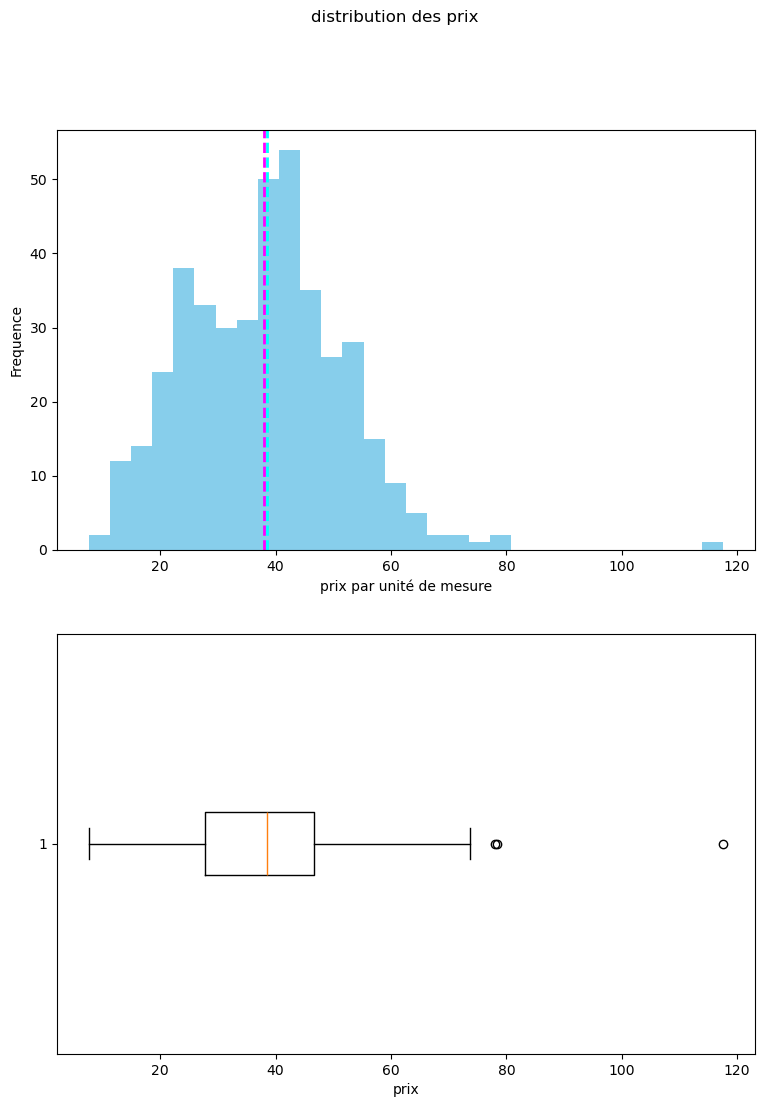

In [3]:
import matplotlib.pyplot as plt 
import seaborn as sns 
label = data1["price_per_unit"]
fig, (ax1,ax2) = plt.subplots(2, 1, figsize = (9,12))
fig.suptitle("distribution des prix")

ax1.hist(label, bins = 30, color='skyblue')
ax1.set_xlabel("prix par unité de mesure")
ax1.set_ylabel('Frequence')

ax1.axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax1.axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)
'''les deux lignes de codes précédentes, permettent de représenter la moyenne
(en rose) et la médiane (en bleu). Ainsi, Si la ligne rose (moyenne) et la ligne 
bleue (médiane) sont très éloignées, cela  indique immédiatement que les données
sont asymétriques (biaisées) ou qu'il y a des outliers qui tirent la moyenne d'un côté
'''

ax2.boxplot(x=label, vert=False)
ax2.set_xlabel("prix")



les graphiques montrent les prix par unité de mètre carée suivent une distribution normale. la majorité des maisons ont des prix compris entre 20 et 50 environs avec un pic situé autour de 40. Par ailleurs, le diagramme en boîte montre que les prix situés au delà de 80, sont des outliers

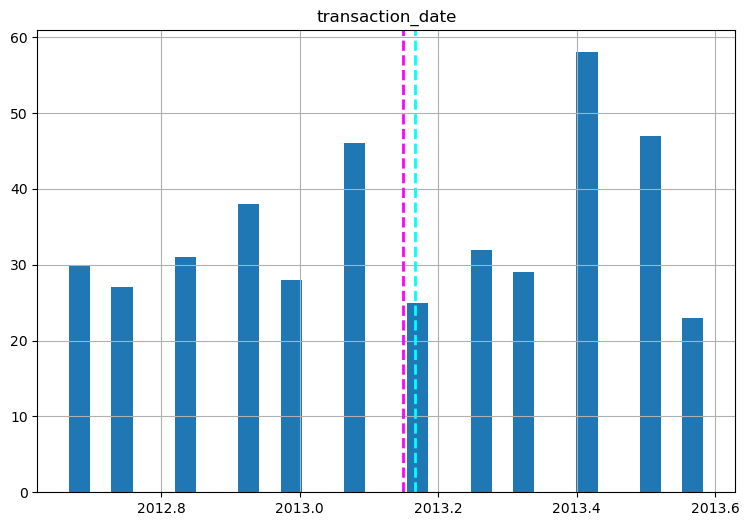

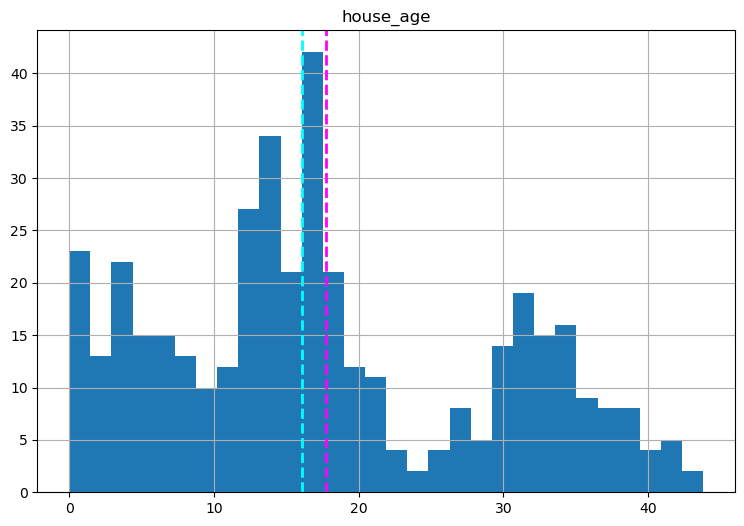

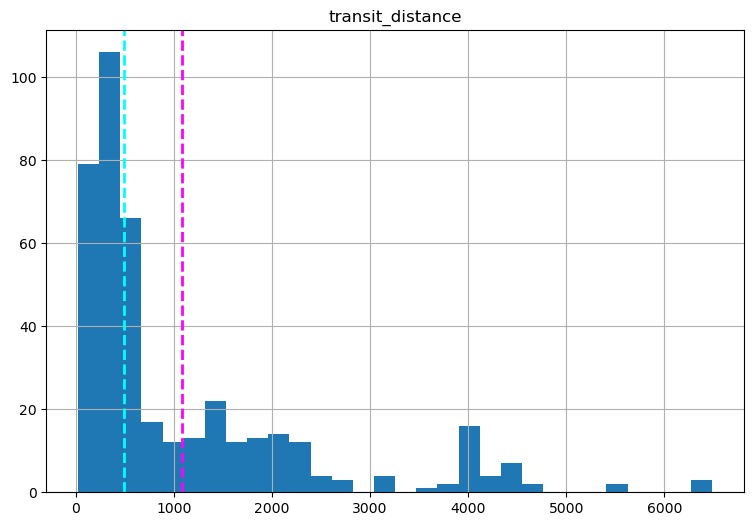

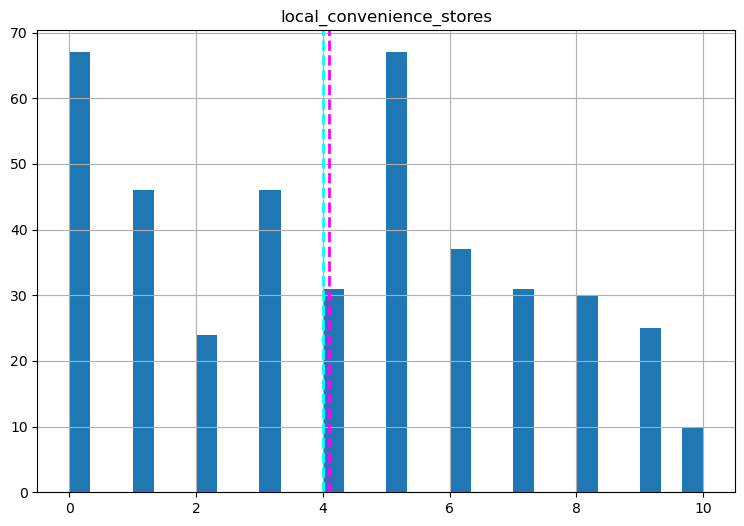

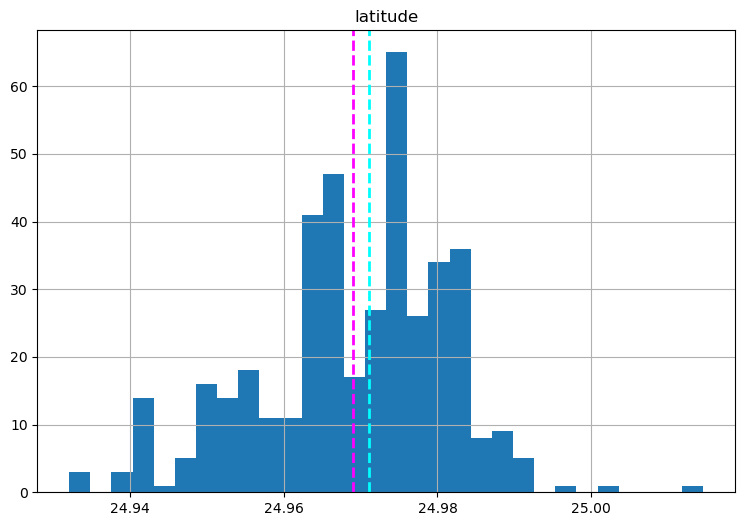

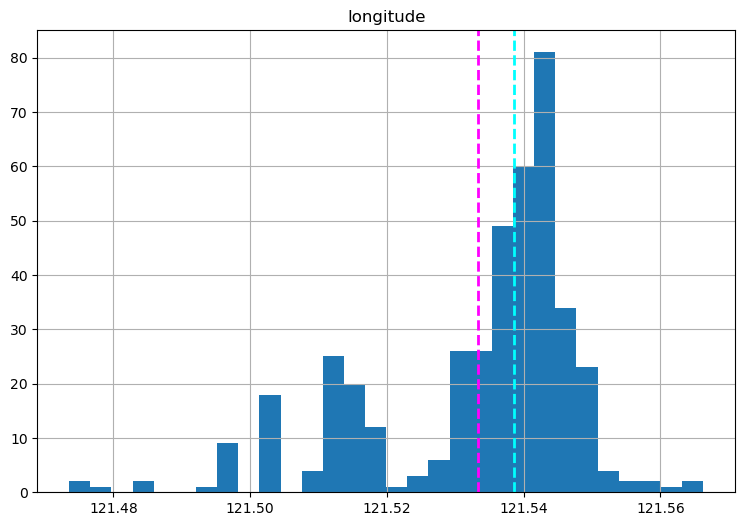

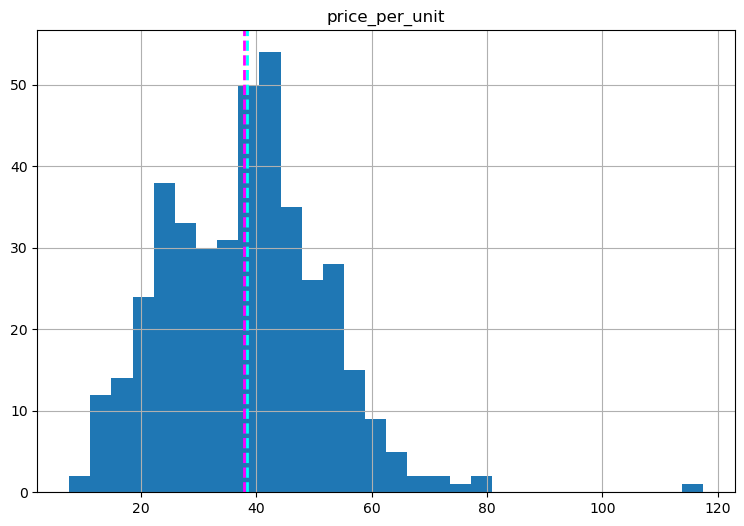

In [4]:
for col in data1:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data1[col]
    feature.hist(bins=30, ax=ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)

Les variables numériques semblent suivre une distribution plus ou moins normale, ceci se traduit surtout par le proximité entre la moyenne et la médianequi qont plus proches du milieu de l'intervalle des valeurs. 
Dans la suite pour un souci d'optimisation, on pourrait revenir voir si la distance entre la moyenne et la médiane au niveau du transit_distant est assez important pour influencer la répartition de la variables; mais pour l'instant entraînons le modèle ainsi

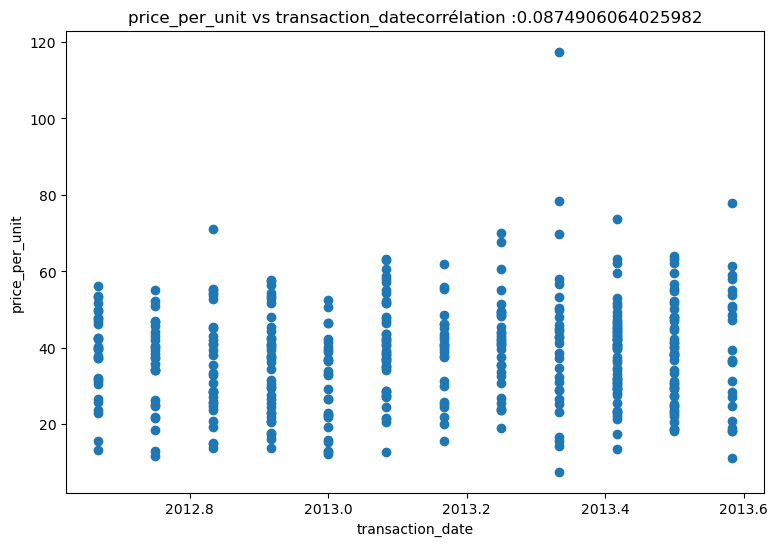

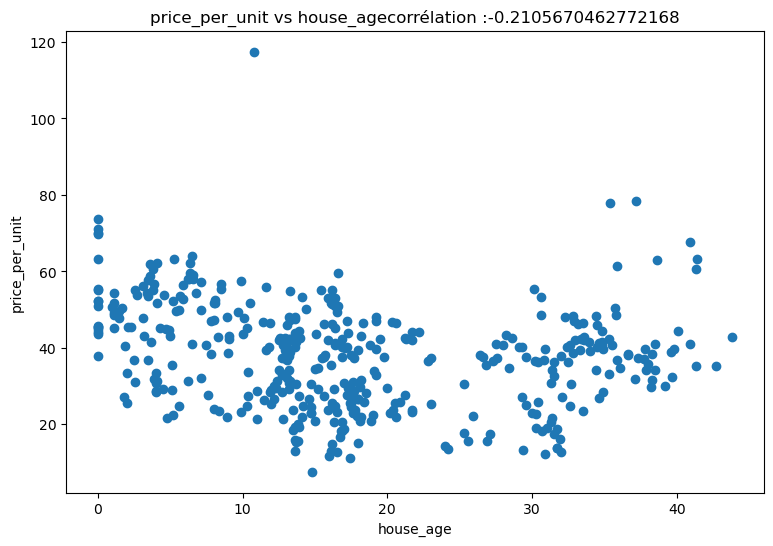

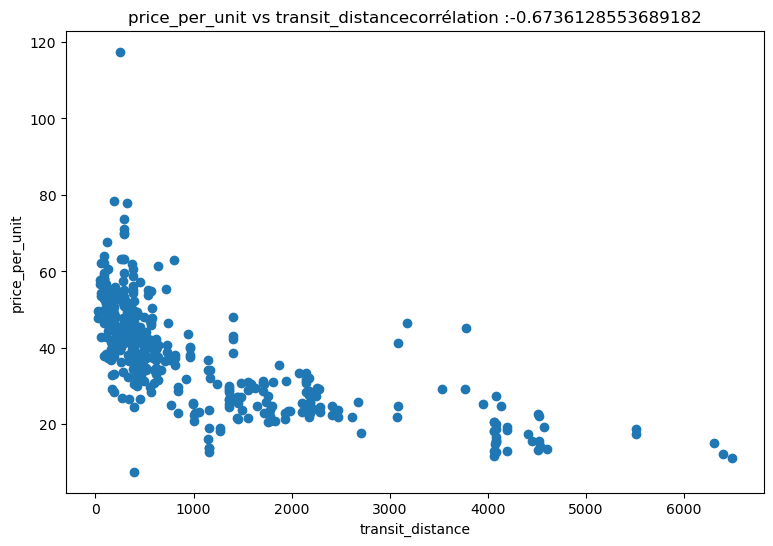

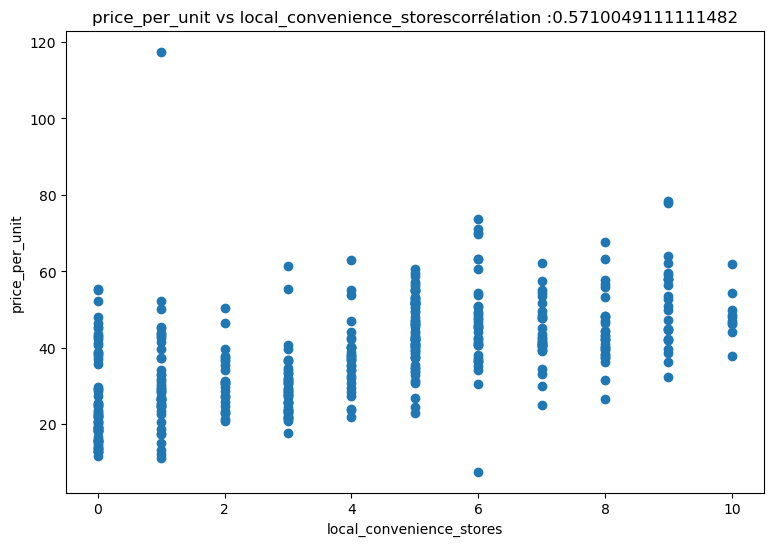

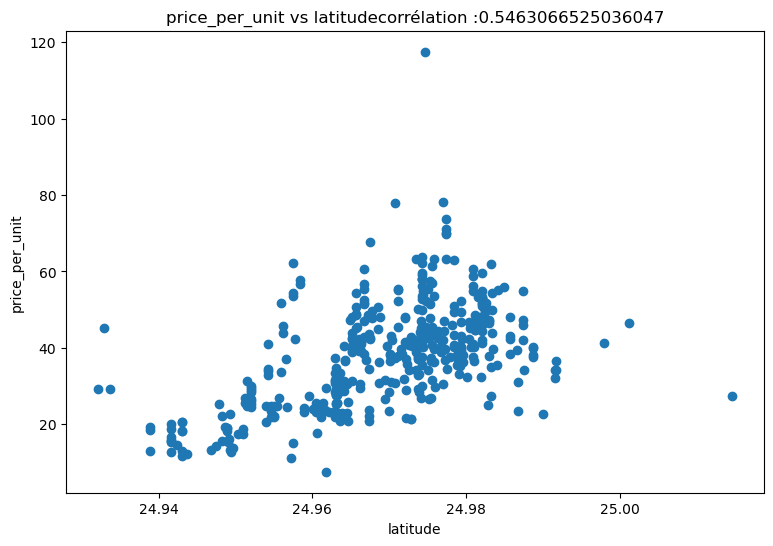

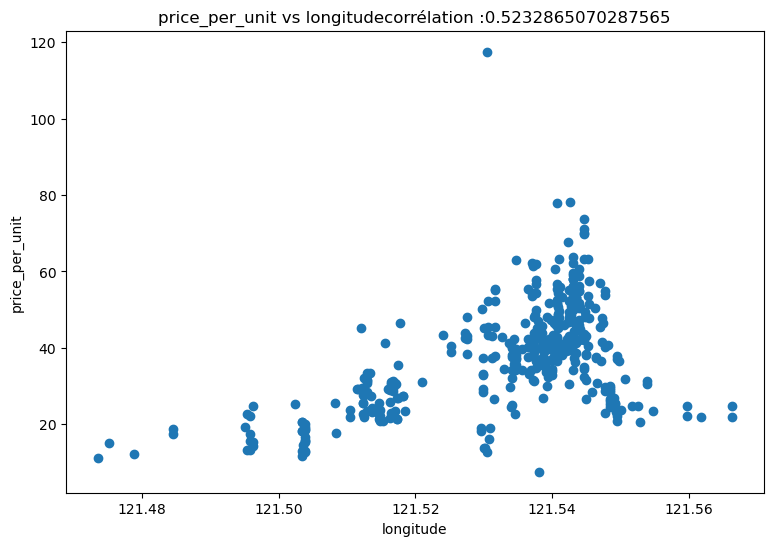

In [5]:
for col in data1.drop(columns='price_per_unit') : 
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = data1[col]
    label = data1['price_per_unit']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('price_per_unit')
    ax.set_title('price_per_unit vs ' + col + 'corrélation :' + str(correlation))


    

D'après les nuages de points, on conctate une tendance haussière pour les variables: local_convenience_stores,longitude, latitude; ce qui traduit une corrélation positive entre ces variabkes et la l'étiquette price_per_unit

par contre, les nuages de points pour les variables: transit_distance, house_age, traduisent une corrélation négatives avec l'étiquette 

en ce qui concer ne la variable transaction_date, la conclusion est un peu flou mais l'indice de correlation calculé peux nous amener à considérer une correlation positive également 

In [6]:
x = data1.drop(columns='price_per_unit')
y = data1['price_per_unit']


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X_train, Y_train)

In [9]:
predictions = model.predict(X_test)


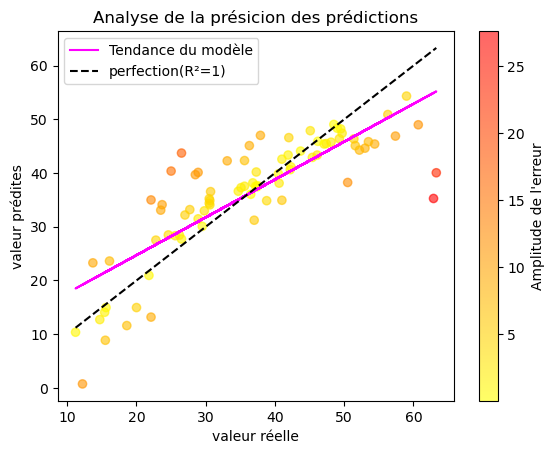

In [26]:
import numpy as np

errors = np.abs(Y_test - predictions) #Calcul de l'erreur absolue pour chaque point

plt.scatter(Y_test, predictions, c=errors,cmap='autumn_r', alpha=0.6)
plt.colorbar(label='Amplitude de l\'erreur')

plt.xlabel('valeur réelle')
plt.ylabel('valeur prédites')
plt.title('Analyse de la présicion des prédictions')

z = np.polyfit(Y_test, predictions, 1)
p= np.poly1d(z)
plt.plot(Y_test, p(Y_test), color='magenta', label='Tendance du modèle')

plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         color='black', linestyle='--', label='perfection(R²=1)')
plt.legend()

D'après ce graphe, on conctate que la ligne de tendance du modèle est plus plate que le ligne de perfection, ce qui nous indique que le modèle à tendance à surestimer les petites valeurs et à surestimer les grandes valeurs (il ramène tout à la moyenne). 

Dans ces conditions, une solution serait de rajouter plus de variables explicatives; mais étant donnée un exercice de regression simple, on vas continuer ainsi pour le moment

In [28]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, predictions)
print("MSE: ", mse)
rmse = np.sqrt(mse)
print("RMSE: ", rmse)

r2 = r2_score(Y_test, predictions)
print("R2: ", r2)

MSE:  53.50561912450431
RMSE:  7.314753524521814
R2:  0.6810580555095813


Nous avons un RMSE de 7.31; ce qui signifie que en moyenne notre modèle se trompe de plus ou moins 7.31 prix; la moyenne des prix étant de 37,98 ; celà nous fais donc une erreur relative de 19%.

Par ailleurs, on à un R² de 68% ce qui signifie que notre modèle est en mesure d'expliquer les variations des prix jusqu'à 68% .

ce sont de bon résultats mais le modèle peux être encore améliorer afin de faire passer le R² au dessus de 70% 

In [30]:
import joblib

filename = './price_model.pkl'
joblib.dump(model, filename)

['./price_model.pkl']

## Use the Trained Model

Save your trained model, and then use it to predict the price-per-unit for the following real estate transactions:

| transaction_date | house_age | transit_distance | local_convenience_stores | latitude | longitude |
| ---------------- | --------- | ---------------- | ------------------------ | -------- | --------- |
|2013.167|16.2|289.3248|5|24.98203|121.54348|
|2013.000|13.6|4082.015|0|24.94155|121.50381|

In [41]:
# Your code to use the trained model

Load_model = joblib.load(filename)
X_new = np.array([[2013.167,16.2,289.3248,5,24.98203,121.54348], [2013.00,13.6,4082.015,0,24.94155,121.50381]]).astype('float64')
print('New sample: {}'.format(list(X_new[0])))
print('New sample: {}'.format(list(X_new[1])))
result = Load_model.predict(X_new)
print('Prediction: {:.0f} $'.format(np.round(result[0])))
print('Prediction: {:.0f} $'.format(np.round(result[1])))

New sample: [np.float64(2013.167), np.float64(16.2), np.float64(289.3248), np.float64(5.0), np.float64(24.98203), np.float64(121.54348)]
New sample: [np.float64(2013.0), np.float64(13.6), np.float64(4082.015), np.float64(0.0), np.float64(24.94155), np.float64(121.50381)]
Prediction: 46 $
Prediction: 14 $


e:\ANC\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
